# Fourier Series Calculation Project

**Author:** Mohammad Ahadzadeh  
**Date:** December 27, 2024   
**Project Description:** Computing the Fourier series in real form for a real valued periodic function using the Fast FFT method.

## Methodology 
My approach to solve this problem is utilizing FFT on sampled time series to calculate fourier series coeficients of input function.
### Refrences
[1] “Discrete Fourier Transform (numpy.fft) — NumPy v2.2 Manual.” Accessed: Dec. 26, 2024. [Online]. Available: https://numpy.org/doc/stable/reference/routines.fft.html

[2] M. Tiger, “How to get the Fourier series using Python’s $\tt fft$,” Signal Processing Stack Exchange. Accessed: Dec. 26, 2024. [Online]. Available: https://dsp.stackexchange.com/q/40780


## Importing Required Libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt

## Setting the variable parameters

T: Period of the function

FS: Number of sample points for plotting

BT: Beginning time

ET: Ending time

maxN: Maximum number of terms in the Fourier series

In [9]:

T = 3  
BT = -3 
ET = 3  
FS = 1000 
maxN = 8  

## Coefficient Calculation Function
The first step for calculating coefficients is to define sampling points. According to the Nyquist criterion, we set  M = 2*N.

Then we use np.fft.rfft to compute frequency components and then we extract the coefficients from the result.

In [10]:
def sampled_fft_coef_calc(func, T, N):
    M = 2 * N 
    t_sample = np.linspace(0, T, M, endpoint=False)
    f_sample = func(t_sample)
    y = np.fft.rfft(f_sample)
    AB = np.zeros((N+1, 2))
    AB[0, 0] = 2 * (y[0].real / M)  
    for n in range(1, N+1):
        AB[n, 0] = 2 * (y[n].real / M)  
        AB[n, 1] = -2 * (y[n].imag / M)  
    return AB


## Creating the fourier series function
We evaluate fourier series using the coefficients calculated above and the formula down below:

  $$
  f(t) = \frac{a_0}{2} + \sum_{n=1}^{N} \left( a_n \cos\left(\frac{2\pi n t}{T}\right) + b_n \sin\left(\frac{2\pi n t}{T}\right) \right)
  $$

In [11]:
def evaluate_func_fs(t, AB, T):
    result = AB[0, 0] / 2
    for n in range(1, len(AB)):
        result += AB[n, 0] * np.cos(2 * np.pi * n * t / T) + AB[n, 1] * np.sin(2 * np.pi * n * t / T)
    return result

## Visualization Function

Now here we create a function to visualize the function and its fourier series.

In [13]:
def plot_fourier(func, name, T, BT, ET, FS, maxN):
    t_range = np.linspace(BT, ET, FS)
    y_true = func(t_range)
    
    COLs = 2
    ROWs = 1 + (maxN - 1) // COLs
    fig, axs = plt.subplots(ROWs, COLs, figsize=(10, 8))
    fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)
    
    for N in range(1, maxN + 1):
        AB = sampled_fft_coef_calc(func, T, N)
        y_approx = evaluate_func_fs(t_range, AB, T)
        
        row = (N - 1) // COLs
        col = (N - 1) % COLs
        axs[row, col].set_title(f'N = {N}')
        axs[row, col].plot(t_range, y_true, 'b-', label='True')
        axs[row, col].plot(t_range, y_approx, 'r--', label='Approximation')
        axs[row, col].legend()
    
    plt.show()

## Testing Phase

I want to test the functions below on my function to confirm it works correctly.

f1: Sine Wave

f2: Sawtooth Wave

f3: Triangle Wave

In [14]:
f1 = lambda t: np.sin(2 * np.pi * t / T)
f2 = lambda t: 2 * ((t % T) / T) - 1
f3 = lambda t: 2 * abs(2 * ((t % T) / T - 0.5)) - 1

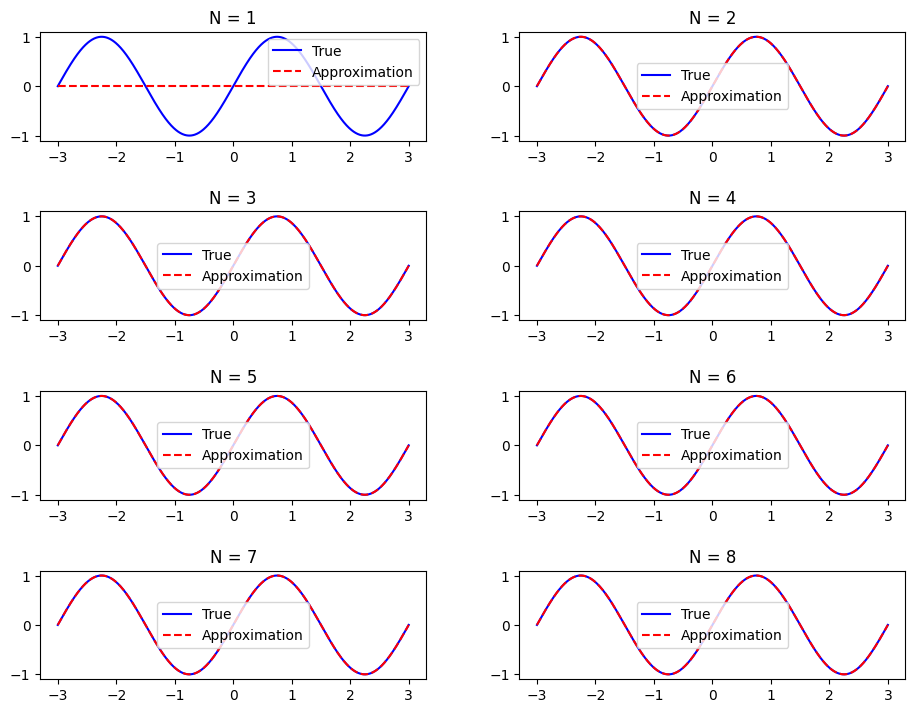

In [15]:
plot_fourier(f1, 'Sine Wave', T, BT, ET, FS, maxN)

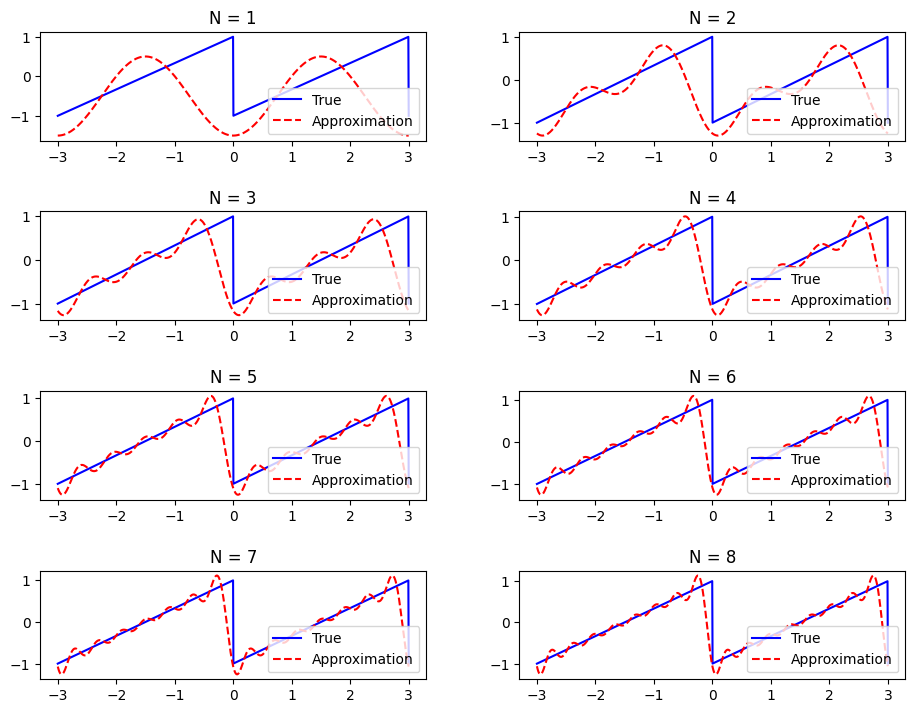

In [16]:
plot_fourier(f2, 'Sawtooth Wave', T, BT, ET, FS, maxN)

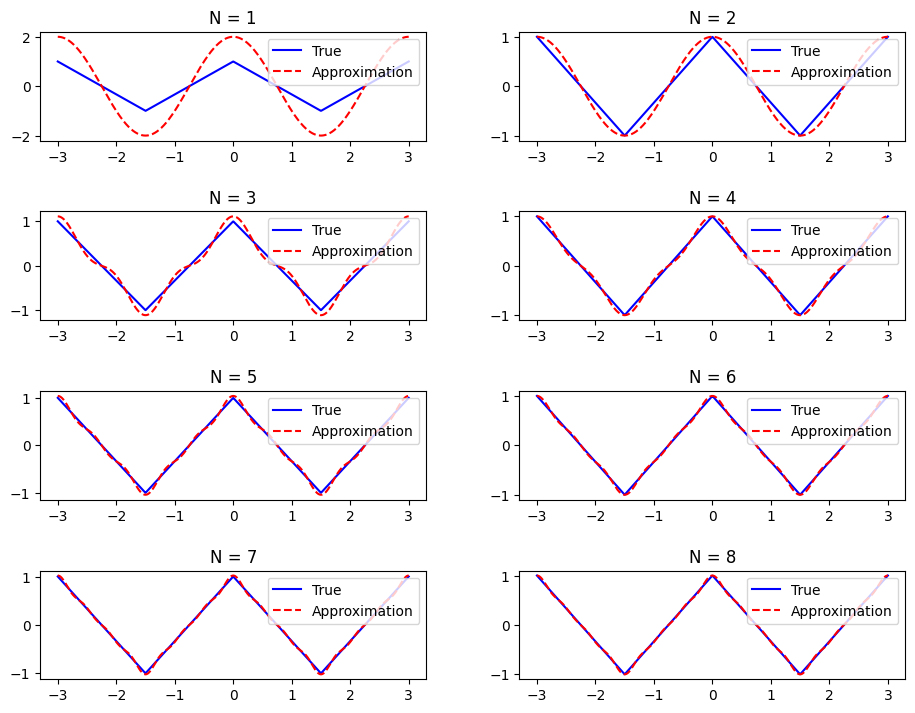

In [17]:
plot_fourier(f3, 'Triangle Wave', T, BT, ET, FS, maxN)

## Conclusion

This project successfully computed the fourier series in real form our example functions using fft and can do this for any given periodic function with real values.